In [3]:
import os, sys
import pandas as pd
import PIL
import nibabel as nib
import imageio  
import numpy as np
from tqdm.notebook import tqdm
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# labels_pth = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/CTPelvic1K/labels_all'

In [33]:
# nii_files = []
# for root, dirs, files in os.walk(labels_pth):
#     for file in files:
#         if file.endswith(".nii"):
#              nii_files.append(os.path.join(file))
# nii_files[:5]

['drr_6001_90_70_1.nii',
 'drr_6001_90_70_2.nii',
 'drr_6001_90_70_3.nii',
 'drr_6001_90_70_4.nii',
 'drr_6001_90_70_5.nii']

In [ ]:
# with open('/media/sadi/Vol_2/IUB_research_local/CT_Bone/CTPelvic1K/labels_all_png', 'w') as f:
#     for line in lines:
#         f.write(line)
#         f.write('\n')

In [50]:
# def nii_to_image(niifile):
#     filenames = os.listdir(filepath) # Read nii Folder 
#     slice_trans = []
 
#     for f in tqdm(filenames):
#         # Start reading nii Documents 
#         img_path = os.path.join(filepath, f)
#         img = nib.load(img_path)    # Read nii
#         img_fdata = img.get_fdata()
#         fname = f.replace('.nii','')   # Remove nii Suffix name of 
#         img_f_path = os.path.join(imgfile, fname)
#         # Create nii The folder of the corresponding image 
#         if not os.path.exists(img_f_path):
#             os.mkdir(img_f_path)    # New Folder 
 
#         # Start converting to an image 
#         (x,y,z) = img.shape
#         for i in range(z):      #z Is a sequence of images 
#             silce = img_fdata[:, :, i]   # You can choose which direction of slice 
#             imageio.imwrite(os.path.join(img_f_path,'{}.png'.format(i)), silce)

In [51]:
# filepath = labels_pth
# imgfile = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/CTPelvic1K/labels_all_png'
# nii_to_image(filepath)

  0%|          | 0/459 [00:00<?, ?it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


# Making Xray Image folder (png)

In [39]:
df = pd.read_csv('/media/sadi/Vol_2/IUB_research_local/CT_Bone/Data/nii_labels/label_files.csv')
df

,drr_6017_90_60,drr_6018_90_60,drr_6019_90_120,drr_6020_90_70,drr_6021_90_120,drr_6022_90_90,drr_6023_90_120,drr_6024_90_110,drr_6067_90_60,drr_6068_90_60,...,drr_6029_90_120,drr_6030_90_120,drr_6031_90_120,drr_6082_90_120,drr_6083_90_120,drr_6085_90_120,drr_6086_90_120,drr_6087_90_120,drr_6088_90_120,drr_6090_90_120
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,1,1,1.0,1.0
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2.0,2,2,2.0,2.0
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,4.0,3,3,3.0,3.0
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,5.0,4,4,4.0,4.0
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,6.0,5,5,6.0,5.0


In [40]:
nii_xray_files = df.columns.tolist()
nii_xray_files = list(map(lambda x: x + '.nii', nii_xray_files))

In [41]:
nii_xray_path = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/CTPelvic1K/DRR_all_int60to120_angle0_CTPelvic1K_dataset6_data'
png_xray_path = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/Data/image_files'
for file in tqdm(nii_xray_files):
    img_path = os.path.join(nii_xray_path, file)
    img = nib.load(img_path)  
    img_fdata = img.get_fdata()
    if not os.path.exists(png_xray_path):
        os.mkdir(png_xray_path)

    # Start converting to an image      #z Is a sequence of images 
    imageio.imwrite(os.path.join(png_xray_path,'{}.png'.format(file[:-4])), img_fdata[:, :])

  0%|          | 0/48 [00:00<?, ?it/s]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 761.0928906885842]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 274.656893113615]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 1001.9033154239994]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 433.2748178542336]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 1223.6153790118267]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 833.0235234638286]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 918.7323645981105]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 1068.448982856281]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 934.4969900173476]. Convert image to uint8 prior to saving to suppress this warning.
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
Lossy conversion from float64 to uint8. Range [0.0, 849.7035327400014]. Convert image to uint8 prior to saving to suppress this warning.


# Making binary gt folder and combining all labels for same file 

In [109]:
df = pd.read_csv('/media/sadi/Vol_2/IUB_research_local/CT_Bone/Data/nii_labels/label_files.csv')
df

,drr_6017_90_60,drr_6018_90_60,drr_6019_90_120,drr_6020_90_70,drr_6021_90_120,drr_6022_90_90,drr_6023_90_120,drr_6024_90_110,drr_6067_90_60,drr_6068_90_60,...,drr_6029_90_120,drr_6030_90_120,drr_6031_90_120,drr_6082_90_120,drr_6083_90_120,drr_6085_90_120,drr_6086_90_120,drr_6087_90_120,drr_6088_90_120,drr_6090_90_120
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,1,1,1.0,1.0
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2.0,2,2,2.0,2.0
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,4.0,3,3,3.0,3.0
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,5.0,4,4,4.0,4.0
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,6.0,5,5,6.0,5.0
5,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,7.0,6,6,7.0,7.0
6,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,8.0,7,7,8.0,8.0
7,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,9.0,8,8,9.0,9.0
8,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,NaN,9,9,NaN,NaN


In [115]:
nii_label_path = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/Data/nii_labels'
binary_label_path = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/Data/binary_labels'
nii_xray_files = df.columns.tolist()
for file in tqdm(nii_xray_files):
    single_file_labels = df[file].tolist()
    single_file_labels = [x for x in single_file_labels if math.isnan(x) == False]
    single_file_labels = list(map(lambda x: file + '_' + str(int(x)) +'.nii', single_file_labels))
    for i, label_file in enumerate(single_file_labels):
        img_path = os.path.join(nii_label_path, label_file)
        img = nib.load(img_path)  
        img_fdata = img.get_fdata()
        if not os.path.exists(binary_label_path):
            os.mkdir(binary_label_path)
        label = img_fdata[:,:,0]
        if i==0:
            binary_gt = np.zeros(label.shape)
        binary_gt = binary_gt + label
    binary_gt[binary_gt > 1] = 1
    binary_gt = 255*binary_gt
    imageio.imwrite(os.path.join(binary_label_path,'{}'.format(file+'_mask.png')), binary_gt)
    

  0%|          | 0/48 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [88]:
z=img_fdata[:,:,0]
z.shape

(525, 680)

In [95]:
binary_gt = 255*binary_gt

In [103]:
file+'_mask.png'

'drr_6090_90_120_mask.png'

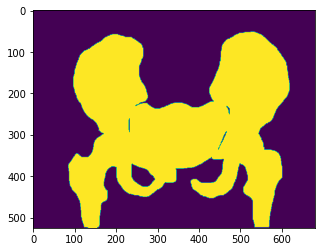

In [98]:
plt.imshow(binary_gt)

In [ ]:
imageio.imwrite(os.path.join(png_xray_path,'{}.png'.format(file+'_mask.png'))

# Renaming Muhaimin files (adding intensity)

In [55]:
filepath = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/CTPelvic1K/dist/dist1/labels/muhaimin'
files = os.listdir(filepath)
for file in files:
    src = os.path.join(filepath, file)
    dst = os.path.join(filepath, file[:-6]+'_120'+file[-6:])
    os.rename(src, dst)
    

# Train-Valid Split

In [14]:
img_path = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/Data/image_files'
label_path = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/Data/binary_labels'
txt_file_path = '/media/sadi/Vol_2/IUB_research_local/CT_Bone/Data'

img_files = os.listdir(img_path)
label_files = os.listdir(label_path)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(img_files, label_files, test_size=0.2, random_state=42)

In [16]:
with open(os.path.join(txt_file_path,'train_img_ids.txt'), 'w') as f:
    for id in X_train:
        f.write(id)
        f.write('\n')

In [17]:
with open(os.path.join(txt_file_path,'train_label_ids.txt'), 'w') as f:
    for id in y_train:
        f.write(id)
        f.write('\n')

In [ ]:
with open(os.path.join(txt_file_path,'valid_img_ids.txt'), 'w') as f:
    for id in X_test:
        f.write(id)
        f.write('\n')

In [19]:
with open(os.path.join(txt_file_path,'valid_label_ids.txt'), 'w') as f:
    for id in y_test:
        f.write(id)
        f.write('\n')